In [0]:
from IPython.display import clear_output
clear_output()

In [2]:
!wget https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/first500/first500final.json

--2019-05-15 20:49:37--  https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/first500/first500final.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74720 (73K) [text/plain]
Saving to: ‘first500final.json’

first500final.json  100%[===================>]  72.97K  --.-KB/s    in 0.02s   

2019-05-15 20:49:37 (2.92 MB/s) - ‘first500final.json’ saved [74720/74720]



In [0]:
!mkdir dataset
!mkdir dataset/0
!mkdir dataset/1
!mkdir dataset/2
!mkdir dataset/3

In [0]:
import json, requests
from PIL import Image
from io import BytesIO

"""
Function that downloads every image of the json file to a folder named after its class. Each image's name contains
the class it corresponds to.

0 -> Modelo
1 -> Diseño
2 -> Composicion
2 -> Otro

"""

def requestImg(image_name, url):
    r = requests.get(url)
    i = Image.open(BytesIO(r.content))
    
    if image_name[0] is 'M':
        i.save("dataset/0/" + image_name)
    elif image_name[0] is 'D':
        i.save("dataset/1/" + image_name)
    elif image_name[0] is 'C':
        i.save("dataset/2/" + image_name)
    elif image_name[0] is 'O':
        i.save("dataset/3/" + image_name)
    
def downloadImgs():
    with open('first500final.json', 'r') as f:
        data = json.load(f)
        
    for i in range(len(data)):
        url = data[str(i)]['URL']
        label = data[str(i)]['LABEL']
        image_name = label + '_' + str(i) + '.jpg'
        requestImg(image_name, url)

In [0]:
downloadImgs()

In [6]:
!ls dataset/3

Otro_141.jpg  Otro_201.jpg  Otro_347.jpg
Otro_173.jpg  Otro_308.jpg  Otro_375.jpg


---
> > KERAS
---

In [7]:
import matplotlib.pyplot as plt

import numpy as np
import glob
import cv2
import os

from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten, Lambda, BatchNormalization
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
'''Config of the model'''

EPOCHS = 10     # Number of training epochs
INIT_LR = 1e-3  # Initial Learning rate
BS = 32         # Batch size

data = []
labels = []

In [0]:
'''
Extraction of the data and label of every image.
'''
for folder in os.listdir('dataset/'):
  dir = 'dataset/' + folder + '/*.jpg'
  class_dir = glob.glob(dir)
  for imagePath in class_dir:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    labels.append(folder) # The label is the  folder each image is in

In [0]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [0]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [12]:
trainX.shape

(367, 28, 28, 3)

In [13]:
trainY.shape

(367,)

In [0]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=4)
testY = to_categorical(testY, num_classes=4)

In [15]:
trainY.shape

(367, 4)

In [16]:
'''Initialization of the model'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

optimizer = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_path = 'test_amazon.h5'

In [0]:
# Load the model so it isn´t necessary to train it everytime
# model.load_weights(model_path)

In [19]:
'''Train the network'''
model.fit(trainX, trainY, batch_size=BS, validation_data=(testX, testY), epochs=EPOCHS, verbose=1)
model.save(model_path)

score = model.evaluate(testX, testY, verbose=1)


print('Test loss: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

Instructions for updating:
Use tf.cast instead.
Train on 367 samples, validate on 123 samples
Epoch 1/10
367/367 [==============================] - 2s 5ms/step - loss: 0.3834 - acc: 0.8379 - val_loss: 0.3024 - val_acc: 0.8699
Epoch 2/10
367/367 [==============================] - 1s 3ms/step - loss: 0.2227 - acc: 0.9135 - val_loss: 0.2328 - val_acc: 0.9248
Epoch 3/10
367/367 [==============================] - 1s 3ms/step - loss: 0.1500 - acc: 0.9435 - val_loss: 0.2230 - val_acc: 0.8984
Epoch 4/10
367/367 [==============================] - 1s 3ms/step - loss: 0.1196 - acc: 0.9571 - val_loss: 0.1824 - val_acc: 0.9268
Epoch 5/10
367/367 [==============================] - 1s 3ms/step - loss: 0.0747 - acc: 0.9755 - val_loss: 0.1304 - val_acc: 0.9573
Epoch 6/10
367/367 [==============================] - 1s 3ms/step - loss: 0.0726 - acc: 0.9837 - val_loss: 0.1796 - val_acc: 0.9370
Epoch 7/10
367/367 [==============================] - 1s 3ms/step - loss: 0.0489 - acc: 0.9864 - val_loss: 0.1848 

In [20]:
!ls

dataset  first500final.json  sample_data  test_amazon.h5


---
> OPENCV - FACE DETECTION
---


In [0]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [22]:
# HAAR CASCADE file from OpenCV repo
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-05-15 20:55:25--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2019-05-15 20:55:25 (12.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [0]:
cascPath = "haarcascade_frontalface_default.xml"
# cascPath = "haarcascade_smile.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

In [0]:
def faceDetector(image, faceCascade):
    
    # image = cv2.imread("dataset/Modelo_425.jpg")
    # cv2_imshow(image)
    image = cv2.resize(image, (500, 500))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=50,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    if len(faces) > 0:
        print("Predicción: Modelo con cara")
    else:
        print("Predicción: Modelo sin cara")
    
    # print("Found {0} faces!".format(len(faces)))
    return faces

In [0]:
# for (x, y, w, h) in faces:
#     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
# cv2_imshow(image)

---
> EVALUACION
---


>* 0 — MODELO
* 1 — DISEÑO
* 2 — COMPOSICION
* 3 — OTRO



In [0]:

# EVALUACION

# load the image
image = cv2.imread('dataset/3/Otro_375.jpg')
original = image.copy()

# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Predicción: Sin modelo


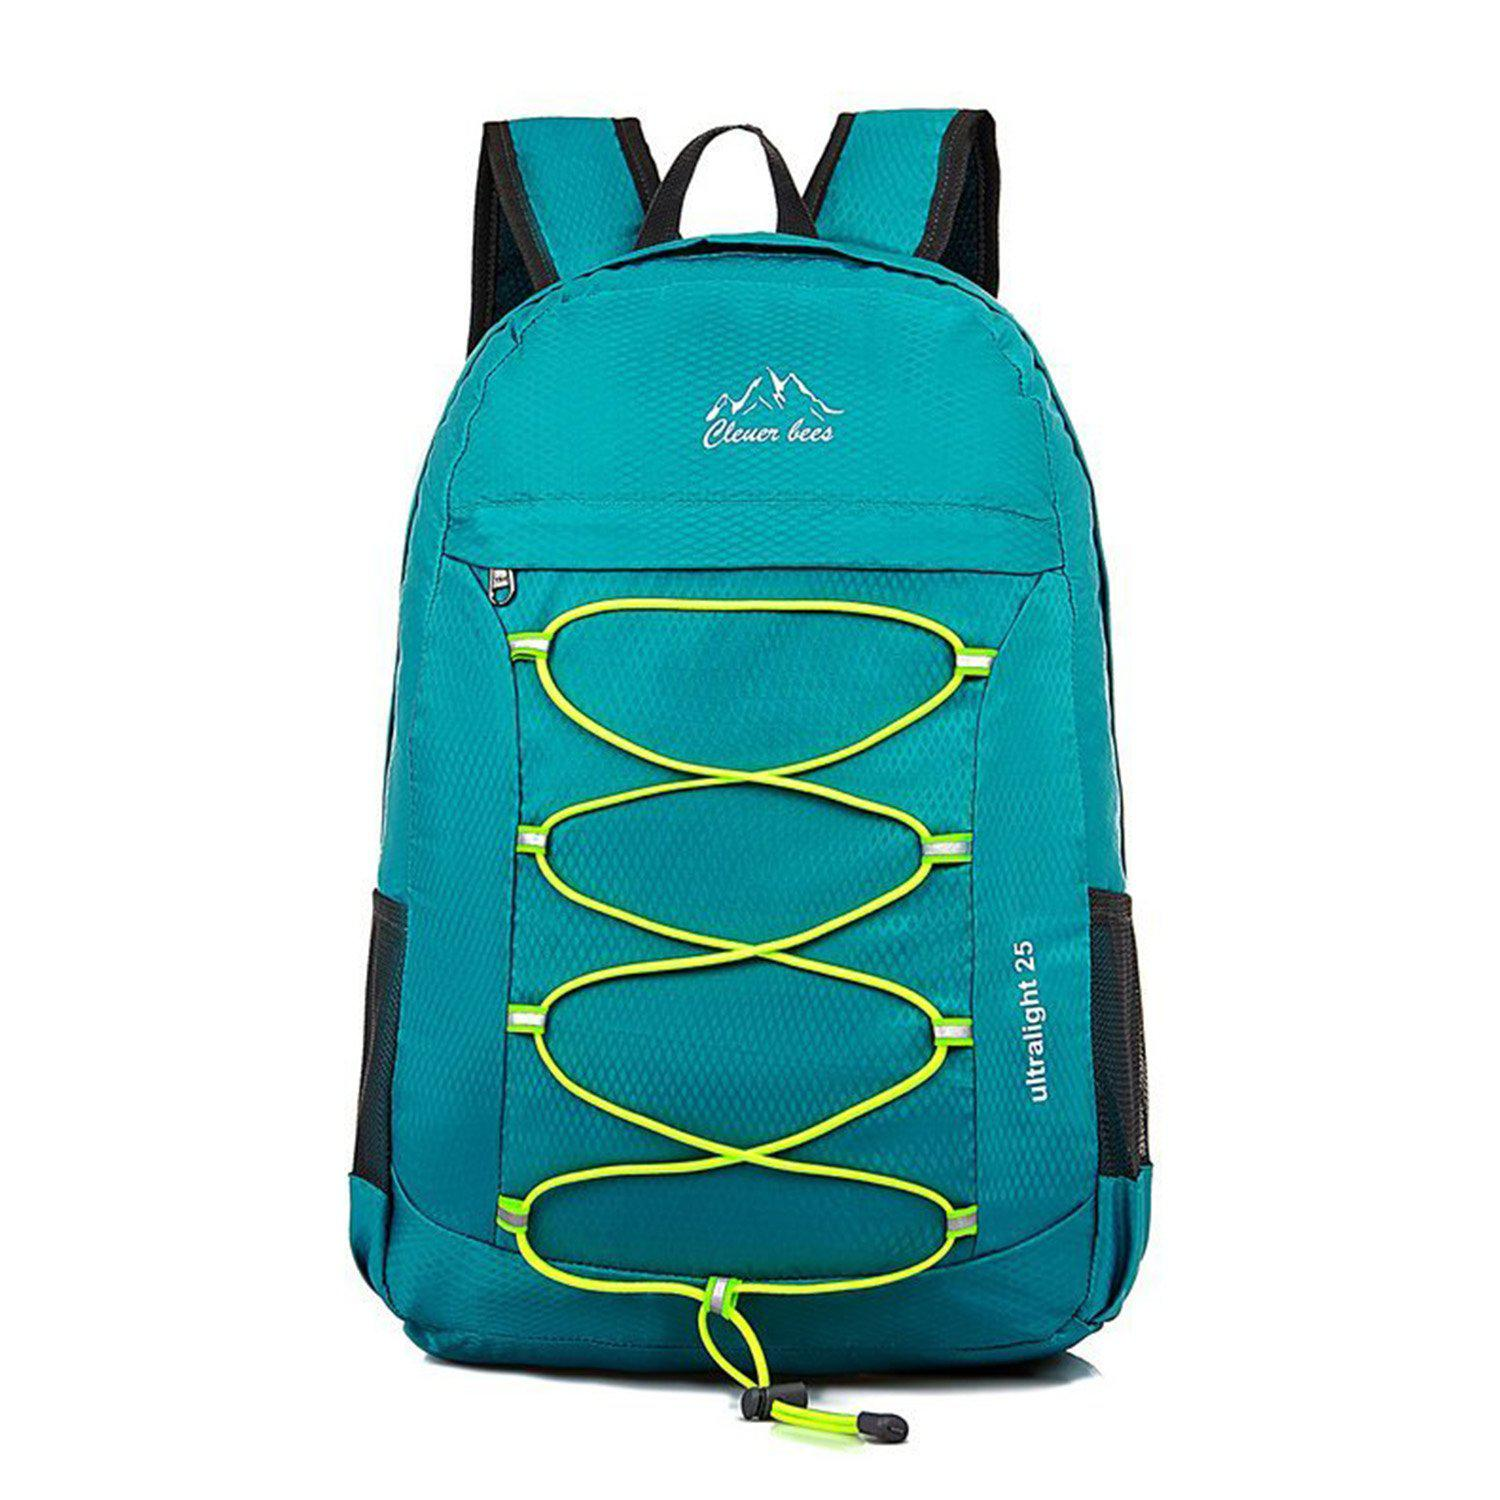

In [27]:
predictions = model.predict(image)[0]
prediction = int(predictions.argmax())

if prediction is not 0:
    print("Predicción: Sin modelo")
else:
    faces = faceDetector(original, faceCascade)
cv2_imshow(original)

In [28]:
!ls dataset/0

Modelo_103.jpg	Modelo_179.jpg	Modelo_259.jpg	Modelo_358.jpg	Modelo_462.jpg
Modelo_104.jpg	Modelo_183.jpg	Modelo_260.jpg	Modelo_35.jpg	Modelo_464.jpg
Modelo_106.jpg	Modelo_184.jpg	Modelo_266.jpg	Modelo_361.jpg	Modelo_467.jpg
Modelo_110.jpg	Modelo_185.jpg	Modelo_26.jpg	Modelo_362.jpg	Modelo_470.jpg
Modelo_112.jpg	Modelo_186.jpg	Modelo_277.jpg	Modelo_371.jpg	Modelo_47.jpg
Modelo_113.jpg	Modelo_188.jpg	Modelo_27.jpg	Modelo_372.jpg	Modelo_480.jpg
Modelo_114.jpg	Modelo_193.jpg	Modelo_281.jpg	Modelo_377.jpg	Modelo_487.jpg
Modelo_119.jpg	Modelo_198.jpg	Modelo_284.jpg	Modelo_394.jpg	Modelo_55.jpg
Modelo_120.jpg	Modelo_19.jpg	Modelo_285.jpg	Modelo_398.jpg	Modelo_56.jpg
Modelo_121.jpg	Modelo_200.jpg	Modelo_290.jpg	Modelo_39.jpg	Modelo_58.jpg
Modelo_122.jpg	Modelo_204.jpg	Modelo_301.jpg	Modelo_402.jpg	Modelo_60.jpg
Modelo_128.jpg	Modelo_206.jpg	Modelo_302.jpg	Modelo_404.jpg	Modelo_62.jpg
Modelo_12.jpg	Modelo_210.jpg	Modelo_304.jpg	Modelo_408.jpg	Modelo_66.jpg
Modelo_131.jpg	Modelo_213.jpg	Modelo_3